
# Taller de Sesgo y Sentimiento en Tweets 🐦

En este taller aplicarás el flujo completo de análisis de texto para responder **preguntas específicas** sobre un conjunto de tweets
etiquetados como `biased` o `non-biased`.


In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-29 05:10:36--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-29 05:10:36--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s


## 1. Cargar y explorar la distribución de etiquetas

**Instrucciones**  
* Carga el archivo `tweets_bias.csv`.  
* Muestra un recuento y un gráfico de barras de `biased` vs `non-biased`.

**Preguntas a responder**  
1. ¿Cuántos tweets hay de cada clase?  
RTA: Vemos que de Biased hay 318 y Non Biased hay 1596
2. ¿Cuál es el porcentaje de `biased` sobre el total?
RTA: El porcentaje de Biased sobre el total es de 16,61%


In [ ]:
import pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df=pd.read_csv('Gender_bias_spanish.csv')
df.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [ ]:
conteo_clases = df['Label'].value_counts()
print(conteo_clases)

Label
non-biased    1596
biased         318
Name: count, dtype: int64


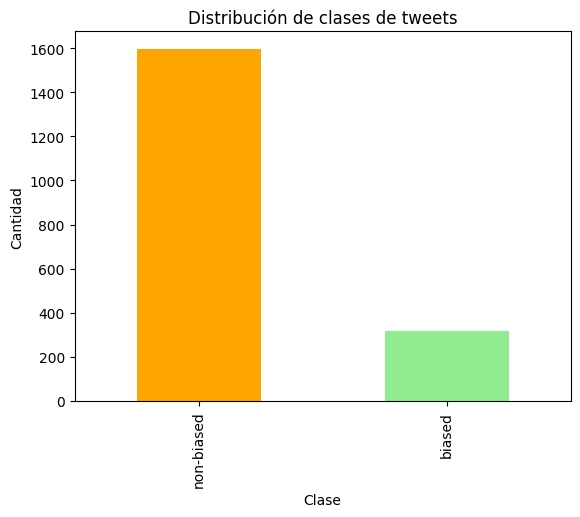

In [ ]:
conteo_clases.plot(kind='bar', color=['orange', 'lightgreen'])
plt.title('Distribución de clases de tweets')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
total_tweets = len(df)  # o df.shape[0]
num_biased_tweets = df['Label'].value_counts()['biased']
porcentaje_biased = (num_biased_tweets / total_tweets) * 100
print(f"El porcentaje de tweets 'biased' es: {porcentaje_biased:.2f}%")

El porcentaje de tweets 'biased' es: 16.61%



## 2. Limpieza y normalización

**Instrucciones**  
Realiza las siguientes transformaciones sobre la columna `text`:

1. Minúsculas.  
2. Quitar tildes.  
3. Eliminar URLs, menciones (`@user`) y hashtags (#tag).  
4. Quitar caracteres no alfabéticos.  
5. Eliminar *stop‑words* en español.
6. Eliminar palabras con menos de 3 caracteres

Guarda el resultado en `clean`.

**Preguntas a responder**  
1. ¿En cuánto cambió la **longitud media** (caracteres) de los tweets tras la limpieza?  
RTA: La longitud media no cambió luego de la limpieza
2. ¿Cuántos tweets quedaron vacíos después de la limpieza?
RTA: Luego de la limpieza quedaron 0 tweets vacíos


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def limpiar(t):
    t=t.lower()
    t=re.sub(r'[^a-zñáéíóúü\s]','',t)
    t=re.sub(r'http\S+|www\S+|https\S+|@\S+|#\S+', '', t)
    t=re.sub(r'[^a-zA-Z\s]', '', t)
    stop_words = stopwords.words('spanish')
    t= ' '.join([palabra for palabra in t.split() if palabra not in stop_words])
    t=' '.join([palabra for palabra in t.split() if len(palabra) >= 3])
    spanish_stop = stopwords.words('spanish')
    t= ' '.join([w for w in t.split() if w not in spanish_stop])
    return t

In [ ]:
df['limpio']=df['Contents'].apply(limpiar)
df[['Contents','limpio']].head()

,Contents,limpio
0,@chumeltorres ya cabrón! sin tí se reciben las...,chumeltorres cabrn reciben noticias colchoncit...
1,¿alguien es tan amable de ir a hacerme la comp...,alguien tan amable hacerme compra maana bajn a...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",jenniferduquee hahaha est rico nadamas falta p...
3,@evagelcot donde lo ves!!? es mi programa favo...,evagelcot ves programa favorito slo encuentro ...
4,como siempre mi tortilla triunfa mas que otros...,siempre tortilla triunfa mas platos playa


In [ ]:
longitud_media_original = df['Contents'].str.len().mean()
longitud_media_limpia = df['Contents'].str.len().mean()

In [ ]:
tweets_vacios = df['Contents'].str.len() == 0
cantidad_tweets_vacios = tweets_vacios.sum()

In [ ]:
print(f"Longitud media original: {longitud_media_original:.2f}")
print(f"Longitud media limpia: {longitud_media_limpia:.2f}")
print(f"Cantidad de tweets vacíos después de la limpieza: {cantidad_tweets_vacios}")

Longitud media original: 92.62
Longitud media limpia: 92.62
Cantidad de tweets vacíos después de la limpieza: 0



## 3. Palabras características por etiqueta

**Instrucciones**  
Para cada clase (`biased` y `non-biased`):

* Calcula las 10 palabras más frecuentes y grafícalas.
* Genera una nube de palabras (colormap `plasma` para `biased`, `viridis` para `non-biased`).

**Preguntas a responder**  
1. ¿Qué palabras son exclusivas o más frecuentes en `biased`?  
RTA: Esta clase tiene varias sin sentido, pero vemos que algunas "exclusivas pueden ser mujer, mujeres, solo y cosas
2. ¿Qué diferencias de tono observas entre ambas nubes?
RTA: En realidad no veo muchas diferencias como tal, solo que la nube de Biased habla más como del género femenino y por sus colores puede ser algo más serio, mientras que en Non Biased se habla un poco más de emociones que expresan alegría

In [ ]:
biased_tweets = df[df['Label'] == 'biased']['limpio']
non_biased_tweets = df[df['Label'] == 'non-biased']['limpio']

In [ ]:
def obtener_palabras_frecuentes(tweets, top_n=10):
    all_words = ' '.join(tweets).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

In [ ]:
top_biased_words = obtener_palabras_frecuentes(biased_tweets)
top_non_biased_words = obtener_palabras_frecuentes(non_biased_tweets)

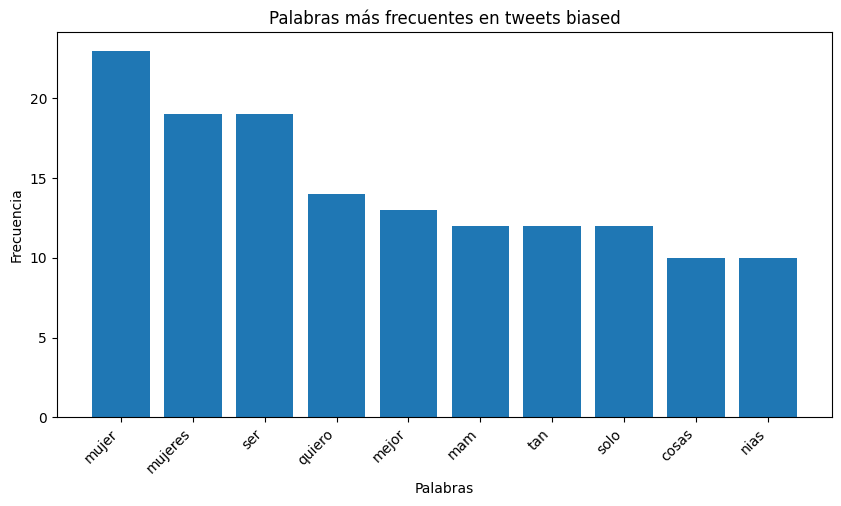

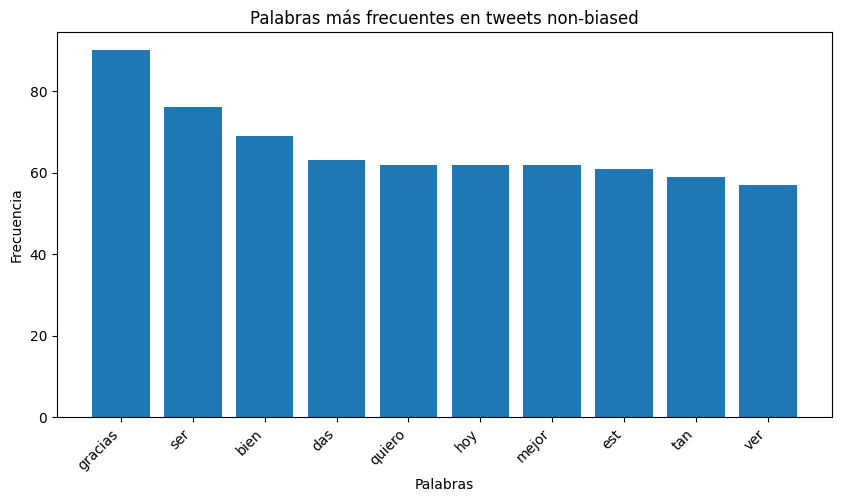

In [ ]:
def graficar_palabras_frecuentes(palabras_frecuentes, titulo):
    palabras, frecuencias = zip(*palabras_frecuentes)
    plt.figure(figsize=(10, 5))
    plt.bar(palabras, frecuencias)
    plt.title(titulo)
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.show()

graficar_palabras_frecuentes(top_biased_words, 'Palabras más frecuentes en tweets biased')
graficar_palabras_frecuentes(top_non_biased_words, 'Palabras más frecuentes en tweets non-biased')

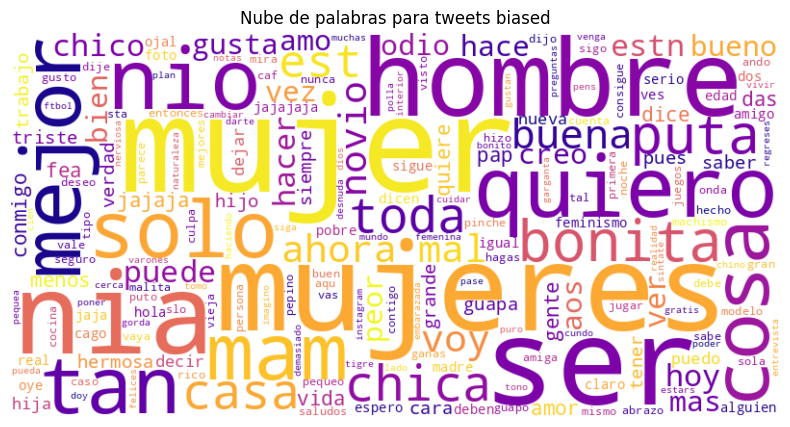

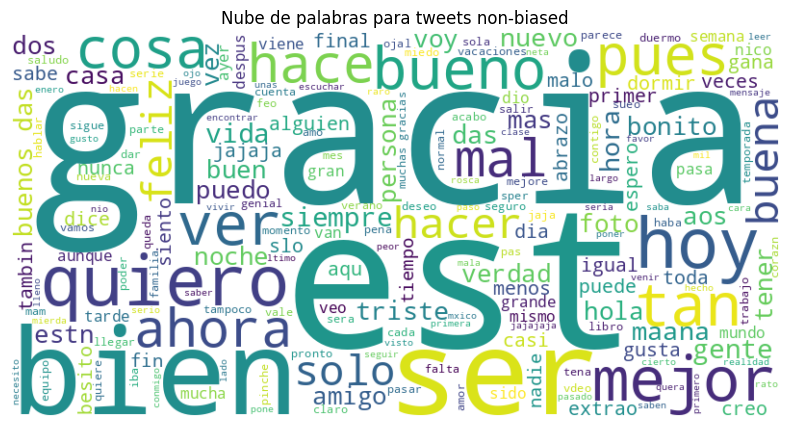

In [ ]:
def generar_nube_palabras(tweets, titulo, colormap):
    texto = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

generar_nube_palabras(biased_tweets, 'Nube de palabras para tweets biased', 'plasma')
generar_nube_palabras(non_biased_tweets, 'Nube de palabras para tweets non-biased', 'viridis')


## 4. Análisis de sentimiento

**Instrucciones**  
* Calcula la polaridad con *TextBlob* para cada tweet.
* Dibuja un **histograma superpuesto** de polaridad para `biased` y `non-biased`.

**Preguntas a responder**  
1. ¿Hay diferencias significativas en la distribución de sentimiento?  
2. ¿Los tweets `biased` son, en promedio, más negativos, neutrales o positivos?
RTA: Siento que los tweets de Biased son un poco más neutrales ya que los Non Biased ya que estos últimos están un poco más inclinados hacia la derecha

In [ ]:
df['polarity'] = df['limpio'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [ ]:
biased_tweets = df[df['Label'] == 'biased']['polarity']
non_biased_tweets = df[df['Label'] == 'non-biased']['polarity']

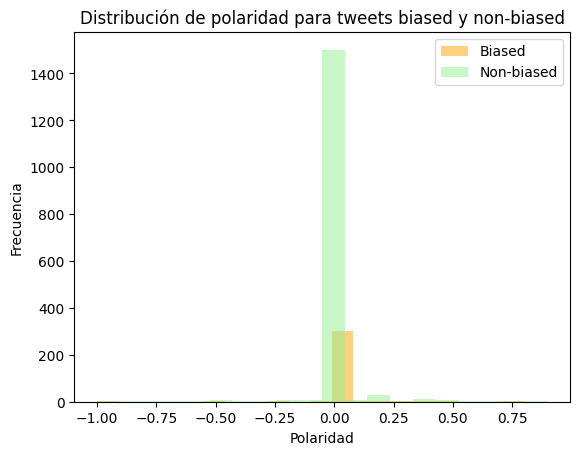

In [ ]:
plt.hist(biased_tweets, bins=20, alpha=0.5, label='Biased', color='orange')
plt.hist(non_biased_tweets, bins=20, alpha=0.5, label='Non-biased', color='lightgreen')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.title('Distribución de polaridad para tweets biased y non-biased')
plt.legend(loc='upper right')
plt.show()


## 5. Hashtags y menciones más comunes

**Instrucciones**  
* Extrae hashtags y menciones originales.  
* Muestra los 10 más frecuentes de cada tipo en un gráfico de barras.

**Preguntas a responder**  
1. ¿Algún hashtag se asocia fuertemente a tweets `biased`?  
2. ¿Qué usuarios son los más mencionados y en qué contexto?


In [ ]:
def extraer_hashtags(texto):
  return re.findall(r"#(\w+)", texto)

def extraer_menciones(texto):
  return re.findall(r"@(\w+)", texto)

df['hashtags'] = df['Contents'].apply(extraer_hashtags)
df['menciones'] = df['Contents'].apply(extraer_menciones)

In [ ]:
todas_hashtags = [hashtag for sublista in df['hashtags'] for hashtag in sublista]
todas_menciones = [mencion for sublista in df['menciones'] for mencion in sublista]

top_hashtags = Counter(todas_hashtags).most_common(10)
top_menciones = Counter(todas_menciones).most_common(10)

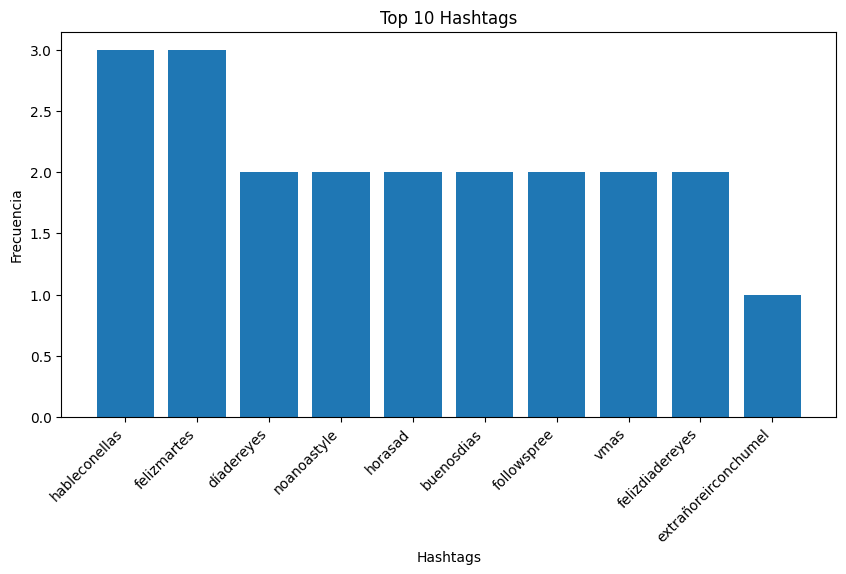

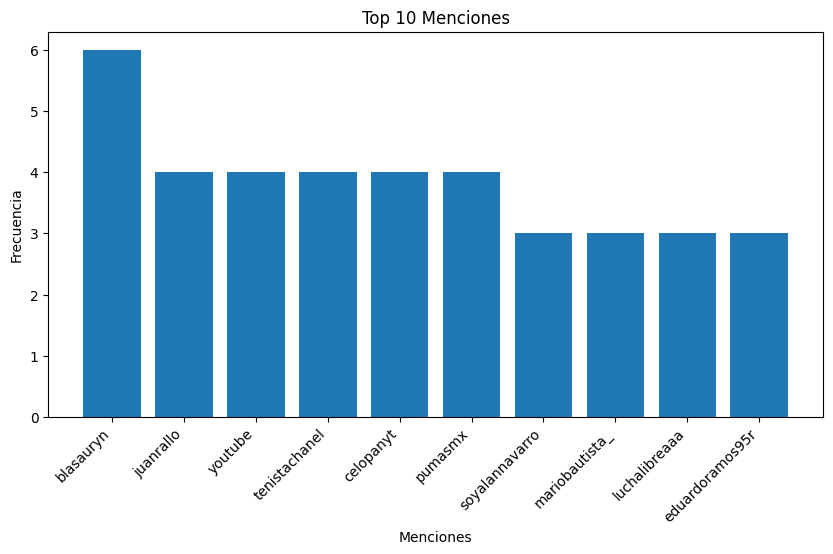

In [ ]:
def graficar_top_10(datos, titulo, etiqueta_x):
  elementos, frecuencias = zip(*datos)
  plt.figure(figsize=(10, 5))
  plt.bar(elementos, frecuencias)
  plt.title(titulo)
  plt.xlabel(etiqueta_x)
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.show()

graficar_top_10(top_hashtags, 'Top 10 Hashtags', 'Hashtags')
graficar_top_10(top_menciones, 'Top 10 Menciones', 'Menciones')


## 6. Conclusiones

Responde brevemente:

* Dos insights sobre el **sesgo** lingüístico.  
* Un insight sobre el **sentimiento**.  
* Una recomendación de comunicación para la marca.
